## Problem Statement:

 Boombikes, A Bikesharing company has recently ends in loses due to the corona pandemic. So, Company decided to understand the demand of the shared bikes among the people after the end of the covid situation and also to undestand the attributes on which the demand of the shared bikes depends which are helpful to improve the profits of the company. 

##### Company also wanted to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

In [277]:
# importing the Libraries and modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [278]:
pd.set_option("display.max_columns", None)

In [279]:
# load the data:
df = pd.read_csv("day.csv")
# data check:
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [280]:
# data check:
df.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
720,721,22-12-2019,1,1,12,0,0,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
721,722,23-12-2019,1,1,12,0,1,1,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
722,723,24-12-2019,1,1,12,0,2,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
723,724,25-12-2019,1,1,12,1,3,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
724,725,26-12-2019,1,1,12,0,4,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [281]:
# data checks:
df.shape

(730, 16)

In [282]:
# data checks:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [283]:
# data check:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**1.Data Handling and Preparation**

Columns like "instant", "dteday" are need to be dropped as they are of no use and Categorical Columns like "season", "month", "weekday", "weathersit" are converted to original names specified meta data table. 

In [284]:
# Dropping Columns:
df = df.drop(["instant", "dteday"], axis = 1)


In [285]:
# Replacing the numerals with categoricallevels:
df["season"] = df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df["mnth"] = df["mnth"].map({1:"january", 2:"february", 3:"march", 4:"april", 5:"may", 6:"june",
                              7:"july", 8:"august", 9:"september", 10: "october", 11: "november",
                              12:"december"})
df["weekday"] = df["weekday"].map({1:"monday", 2:"tuesday", 3:"wednesday", 4:"thursday", 5:"friday",
                                  6:"saturday", 0:"sunday"})
df["weathersit"] = df["weathersit"].map({1:"clear", 2:"mist", 3:"light snow", 4:"heavy rain"})

In [286]:
# datatypes check:
df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

***1.1 Data Visualisation***

<AxesSubplot:xlabel='cnt', ylabel='Density'>

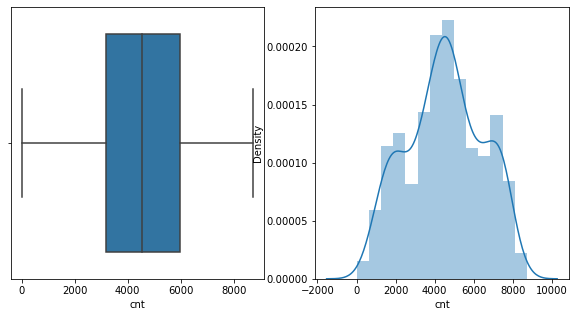

In [287]:
# univariate Analysis on cnt variable:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df["cnt"])
plt.subplot(1,2,2)
sns.distplot(df["cnt"])

<AxesSubplot:xlabel='temp', ylabel='Density'>

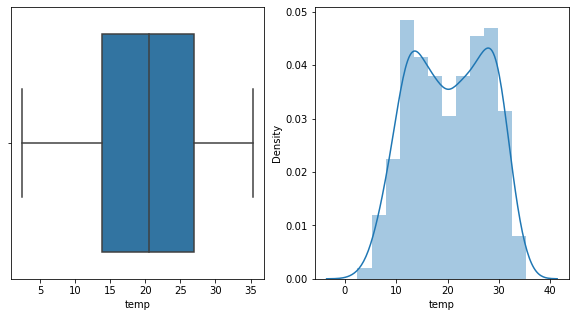

In [288]:
# univariate Analysis on temp variable:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df["temp"])
plt.subplot(1,2,2)
sns.distplot(df["temp"])

<AxesSubplot:xlabel='hum', ylabel='Density'>

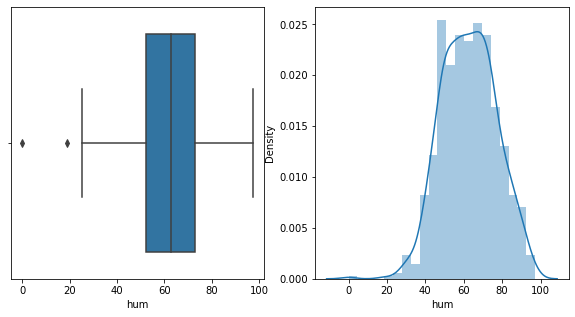

In [289]:
# univariate Analysis on hum variable:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df["hum"])
plt.subplot(1,2,2)
sns.distplot(df["hum"])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

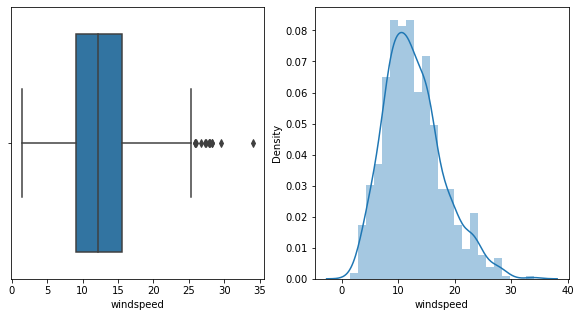

In [290]:
# univariate Analysis on windspeed variable:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df["windspeed"])
plt.subplot(1,2,2)
sns.distplot(df["windspeed"])

<AxesSubplot:xlabel='weathersit', ylabel='count'>

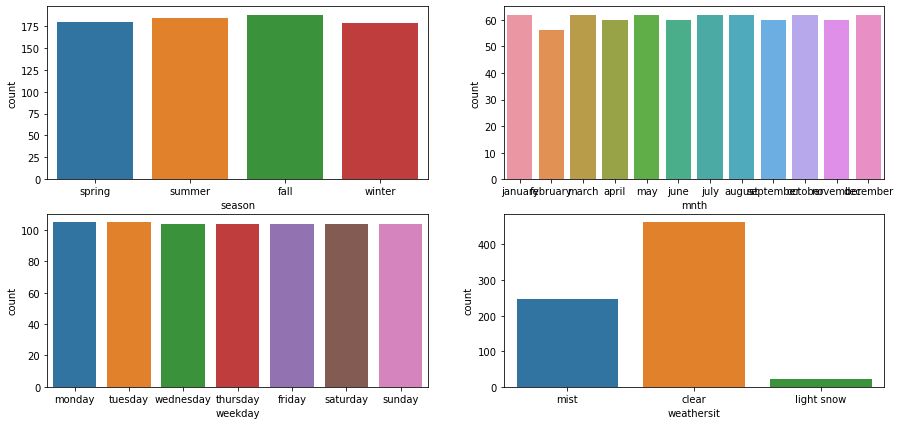

In [291]:
#univariate analysis on categorical variables:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.countplot(df["season"])
plt.subplot(2,2,2)
sns.countplot(df["mnth"])
plt.subplot(2,2,3)
sns.countplot(df["weekday"])
plt.subplot(2,2,4)
sns.countplot(df["weathersit"])

<AxesSubplot:xlabel='weathersit', ylabel='count'>

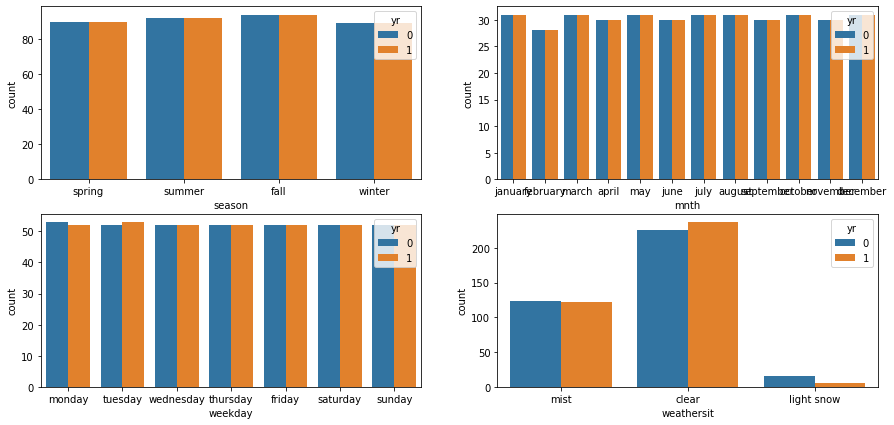

In [292]:
#Bi variate analysis on categorical variables:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.countplot(df["season"], hue=df["yr"])
plt.subplot(2,2,2)
sns.countplot(df["mnth"], hue=df["yr"])
plt.subplot(2,2,3)
sns.countplot(df["weekday"], hue=df["yr"])
plt.subplot(2,2,4)
sns.countplot(df["weathersit"], hue=df["yr"])

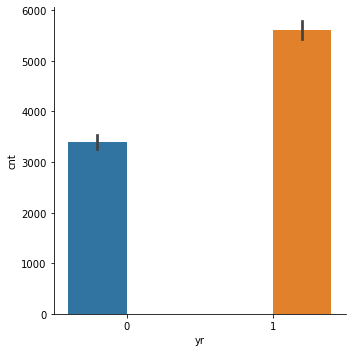

In [293]:
# Bi - variate analysis:
sns.catplot(x="yr", y="cnt", hue="yr", kind="bar", data=df)

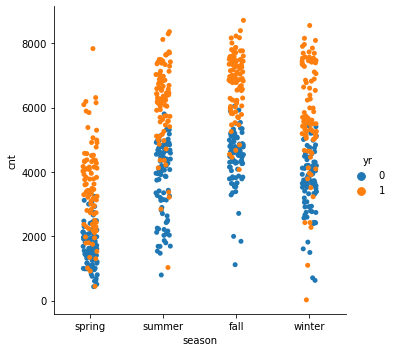

In [294]:
## Bi - variate analysis:
sns.catplot(x="season", y="cnt", hue="yr", data=df)

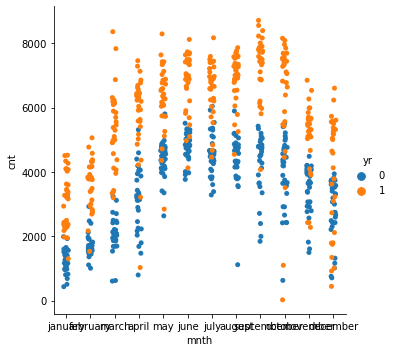

In [295]:
sns.catplot(x="mnth", y="cnt", hue="yr", data=df)

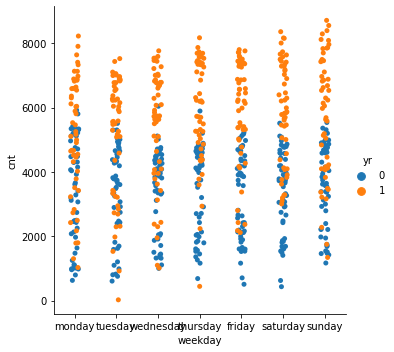

In [296]:
sns.catplot(x="weekday", y="cnt", hue="yr", data=df)

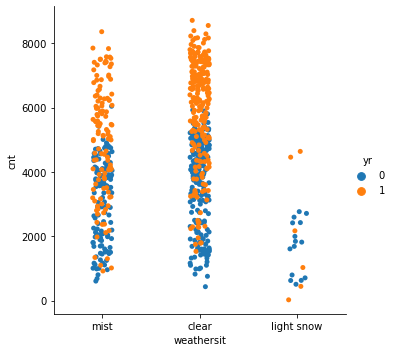

In [297]:
sns.catplot(x="weathersit", y="cnt", hue="yr", data=df)

<AxesSubplot:title={'center':'Heat map'}>

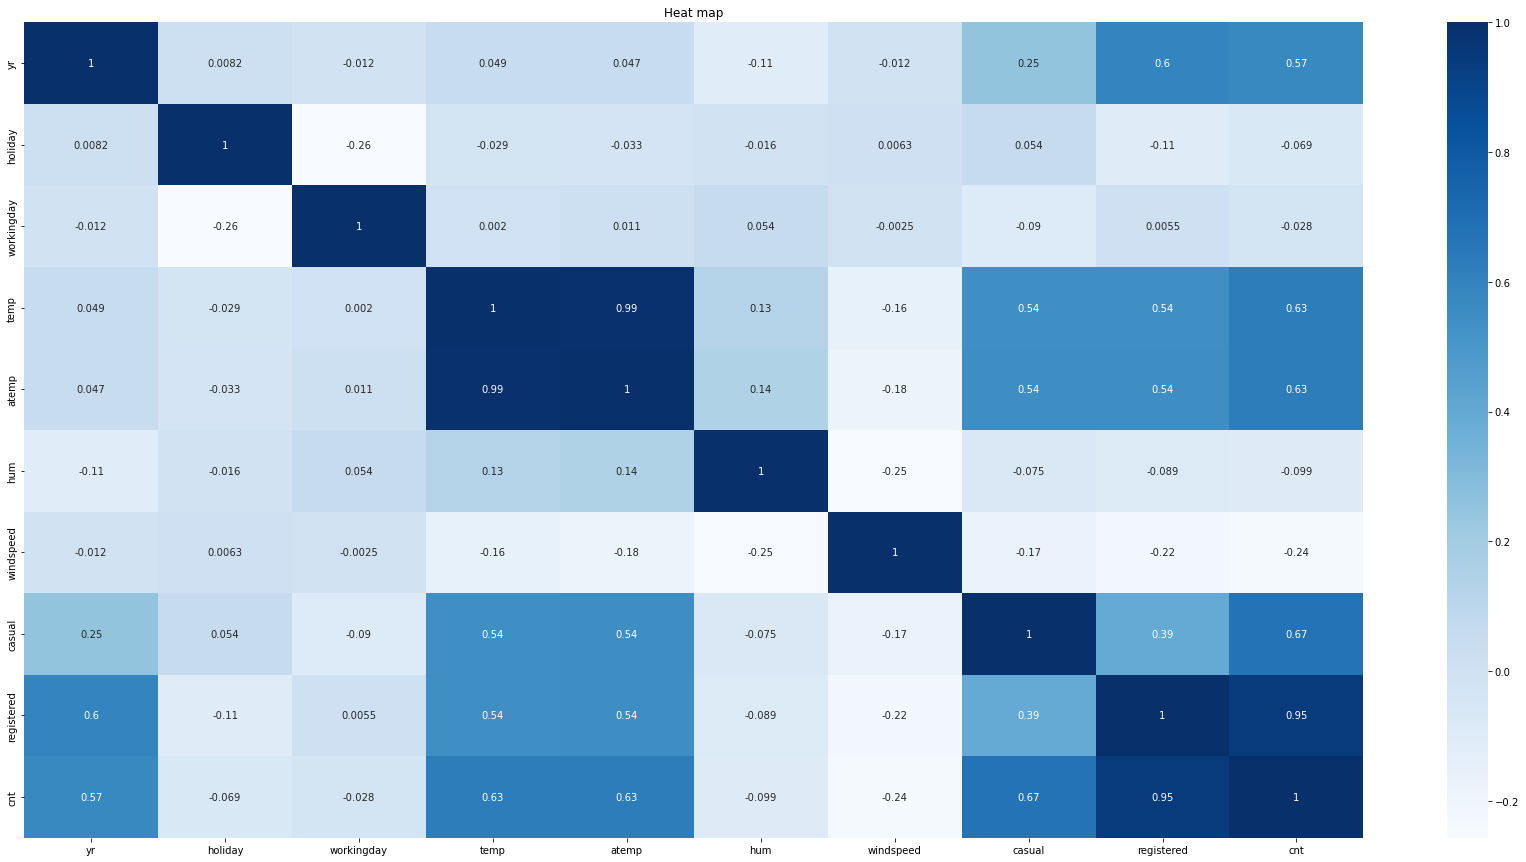

In [298]:
# Bi- Variate Analysis:
# correlation matrix with heat map:
plt.figure(figsize=(30,15))
plt.title("Heat map")
sns.heatmap(df.corr(),annot = True, cmap= "Blues")

<Figure size 2160x1080 with 0 Axes>

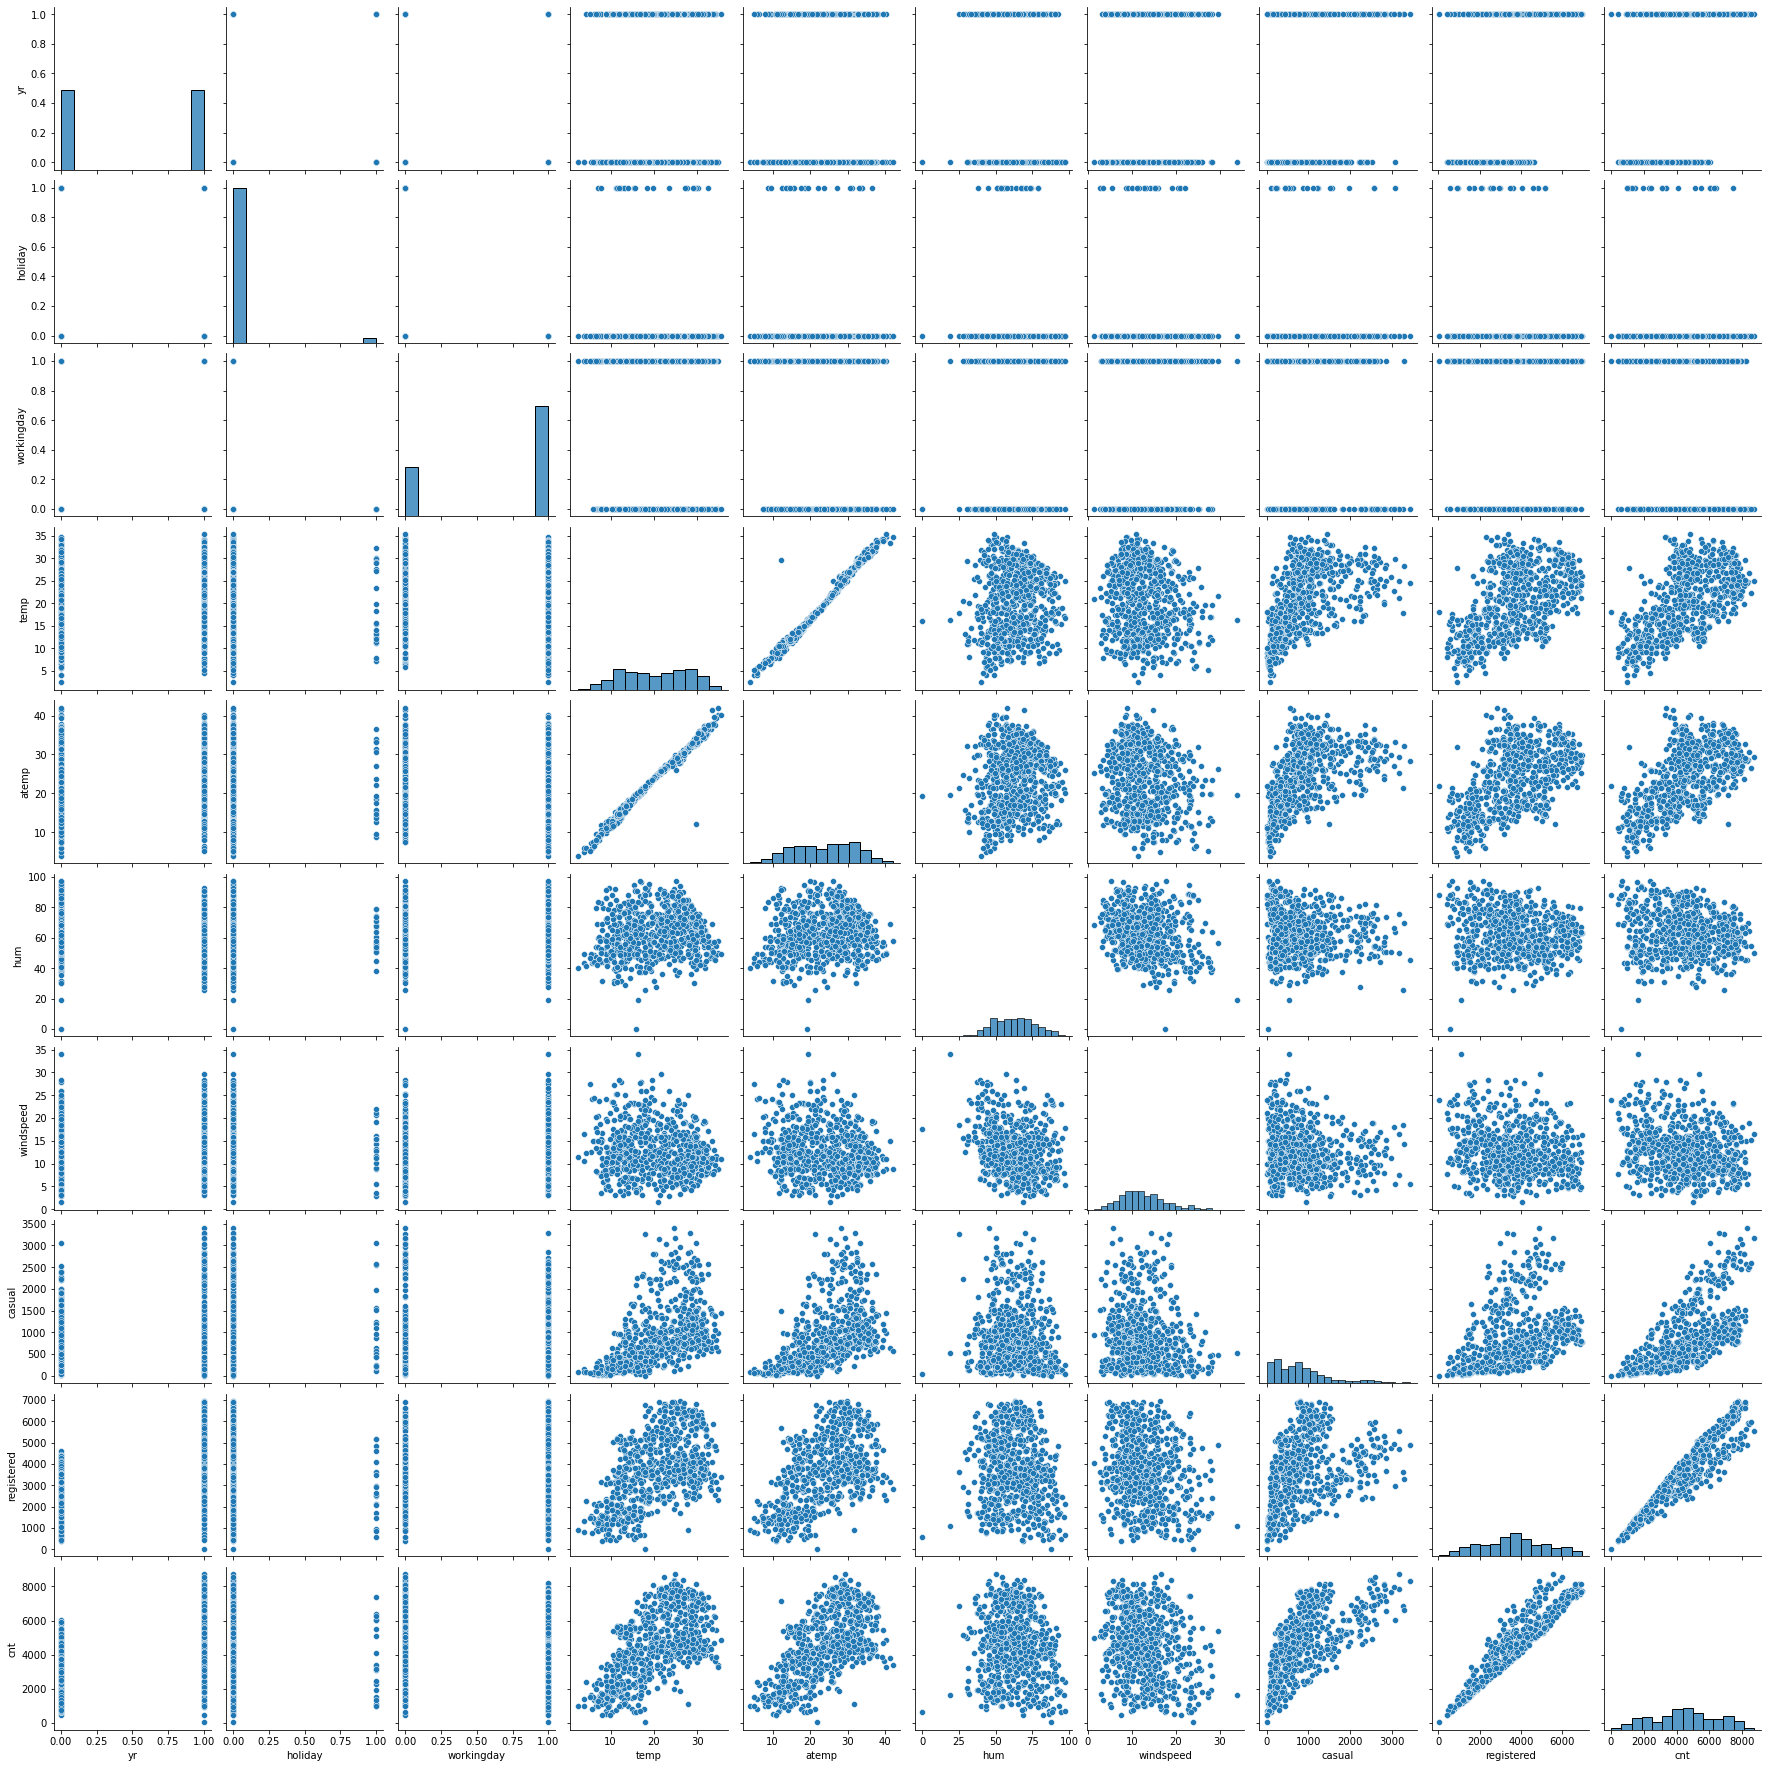

In [299]:
# Bi- Variate Analysis:
# Scatter plot
plt.figure(figsize=(30,15))
sns.pairplot(df)

<Figure size 1080x504 with 0 Axes>

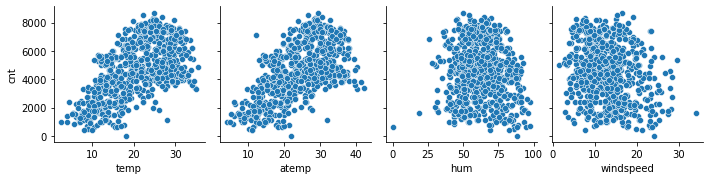

In [300]:
# Bi- Variate Analysis:
#Pair plots for numerical variables:
plt.figure(figsize=(15,7))
sns.pairplot(x_vars=["temp","atemp", "hum","windspeed"], y_vars = "cnt", data = df)

<AxesSubplot:title={'center':'Heat map'}>

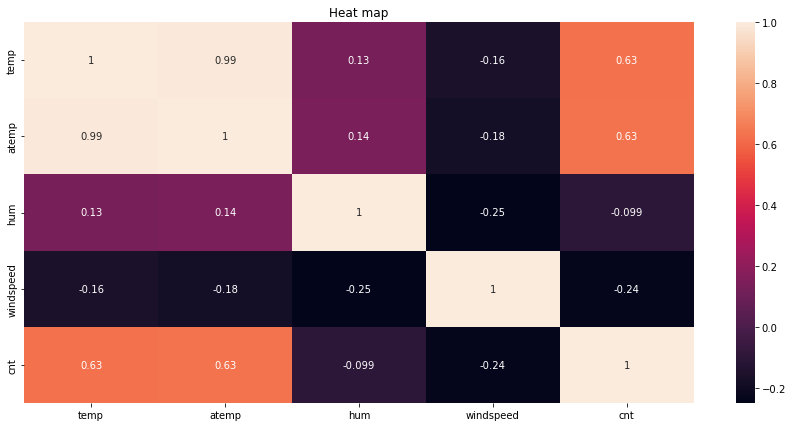

In [301]:
# Bi-Variate Analysis:
plt.figure(figsize=(15,7))
plt.title("Heat map")
sns.heatmap(df[["temp","atemp", "hum","windspeed","cnt"]].corr(), annot=True)

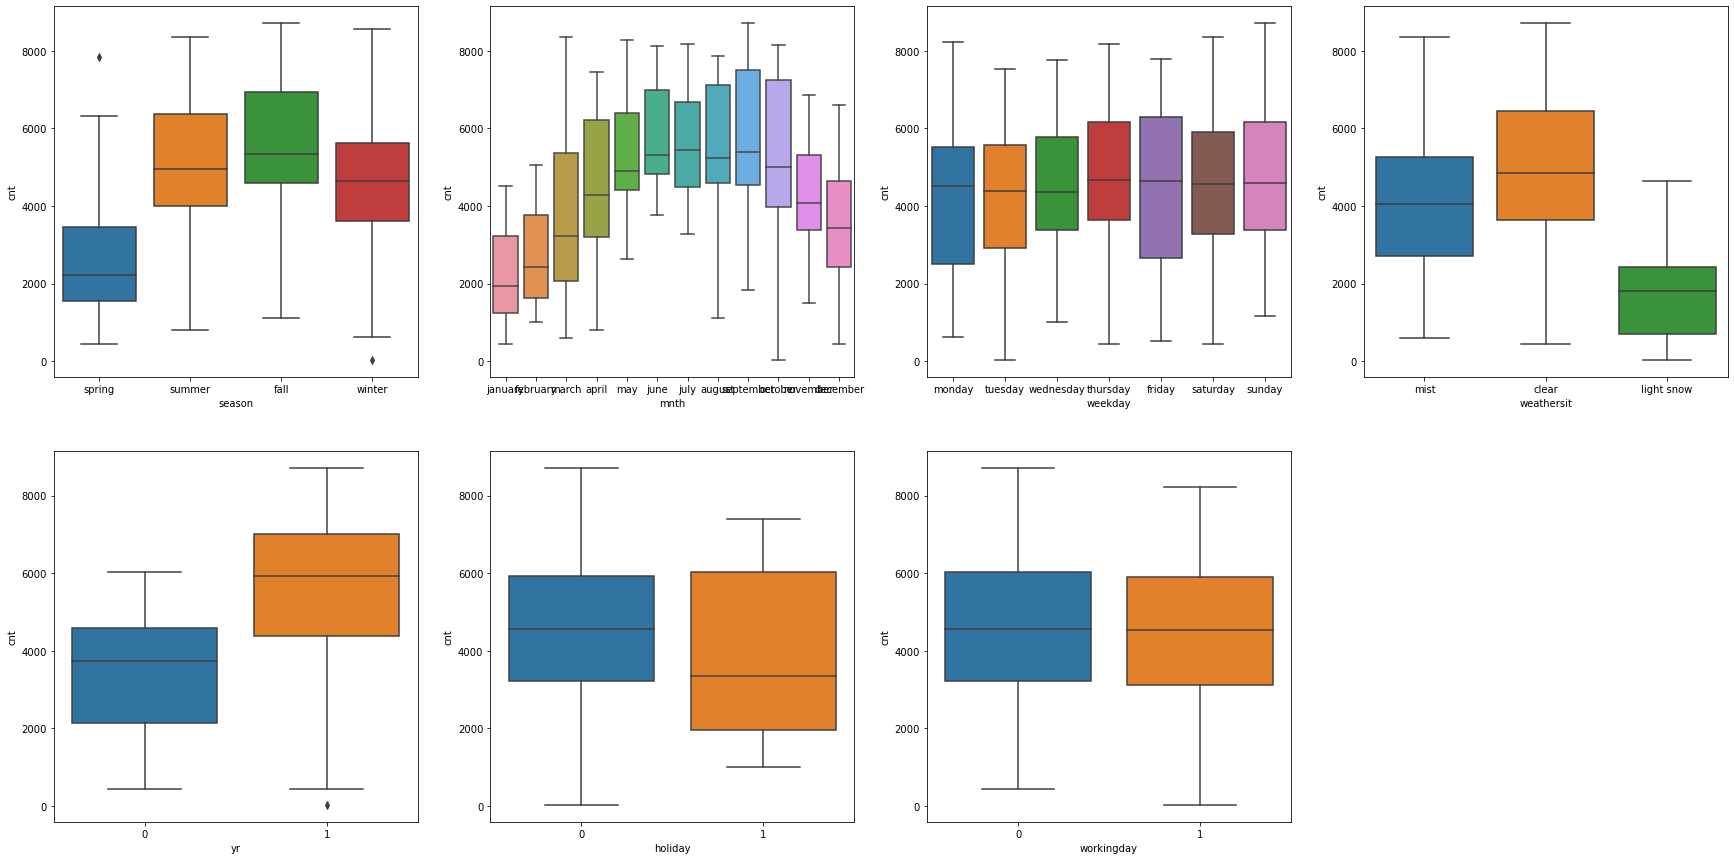

In [302]:
#Bi-Variate Anaalysis:
# box plot for categorical varaibles vs cnt variable:
plt.figure(figsize=(30,15))
plt.subplot(2,4,1)
sns.boxplot(x="season", y="cnt", data=df)
plt.subplot(2,4,2)
sns.boxplot(x="mnth", y="cnt", data=df)
plt.subplot(2,4,3)
sns.boxplot(x="weekday", y="cnt", data=df)
plt.subplot(2,4,4)
sns.boxplot(x="weathersit", y="cnt", data=df)
plt.subplot(2,4,5)
sns.boxplot(x="yr", y="cnt", data=df)
plt.subplot(2,4,6)
sns.boxplot(x="holiday", y="cnt", data=df)
plt.subplot(2,4,7)
sns.boxplot(x="workingday", y="cnt", data=df)
plt.show()

In [303]:
# Creating dummy variables for all categorical variables
cat_vars = df.select_dtypes(include="object")
cat_vars_df = pd.get_dummies(cat_vars,drop_first=True)

In [304]:
cat_vars_df.head()

,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [305]:
# Merging the dataframes:
df = pd.concat([df, cat_vars_df], axis=1) 

In [306]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist
0,spring,0,january,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,january,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [307]:
# Dropping all the Categorical Variables which converted to dummy variables:
df = df.drop(["season", "mnth", "weekday", "weathersit"],axis=1)
# Dropping casual, registered Variables as they are directly related tot cnt variables:
df = df.drop(["casual","registered"],axis=1)

In [308]:
#Data check:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [309]:
#Data check:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_light snow', 'weathersit_mist'],
      dtype='object')

In [310]:
#Data check:
df.shape

(730, 30)

In [311]:
#Data check:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***1.2 Split the data into train and test datasets***

In [312]:
# Splitting the data:
df_train, df_test = train_test_split(df,train_size=0.7, random_state=100)

In [313]:
df_train.shape

(510, 30)

In [314]:
df_test.shape

(220, 30)

***1.3 Feature Scaling***

In [315]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [316]:
scale_vars = ["temp", "atemp", "hum", "windspeed","cnt"]

In [317]:
scaler = MinMaxScaler()

In [318]:
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

In [319]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [320]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**2. Training the model**

<AxesSubplot:>

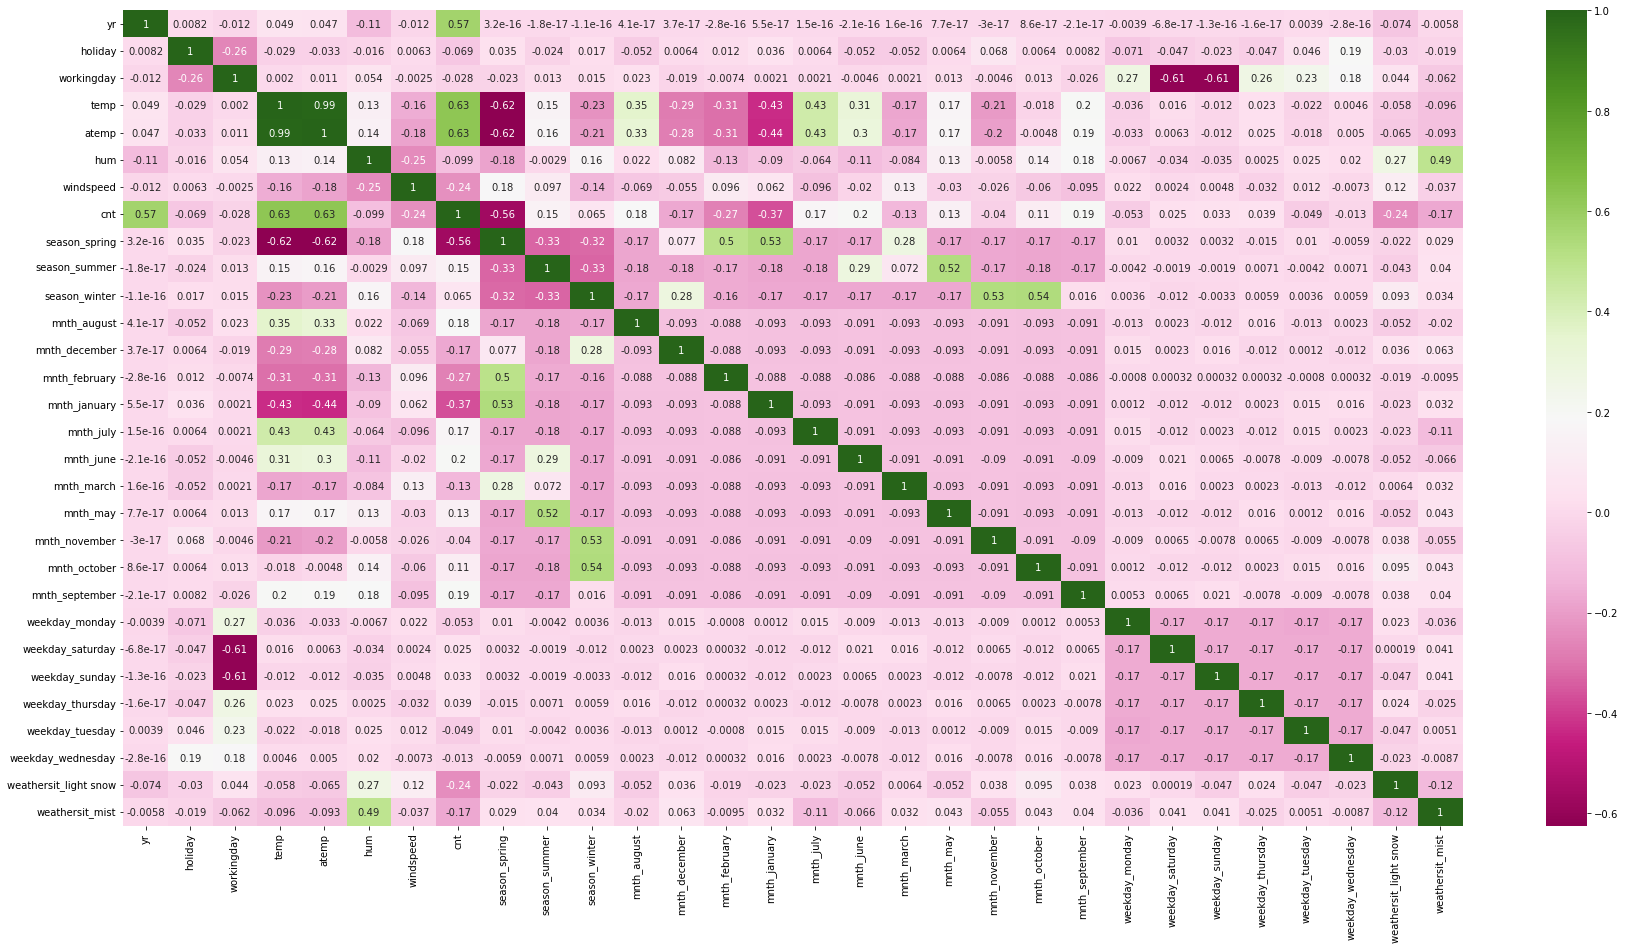

In [321]:
# Checking correlation between variables after creating dummy variables: 
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True, cmap="PiYG")

As we are about to predict the demand of the bikes, Considering cnt variable as
response or target variable and all the remaining variables as independent or predictor variables

In [322]:
# Response Variable:
y_train = df_train.pop("cnt")
# Feature Variable:
x_train = df_train

***2.1 Recurssive Feature selection:***


In [323]:
# Training the model:
lm = LinearRegression()
lm.fit(x_train,y_train)
# Running RFE:
rfe = RFE(lm,15)
rfe = rfe.fit(x_train,y_train)


In [324]:
# rfe.support_, rfe.ranking_ are used understand whether features selected or not and also to 
# to understand the ranking within them.
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_august', False, 10),
 ('mnth_december', True, 1),
 ('mnth_february', False, 2),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 12),
 ('mnth_march', False, 15),
 ('mnth_may', False, 9),
 ('mnth_november', True, 1),
 ('mnth_october', False, 13),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 8),
 ('weekday_saturday', False, 5),
 ('weekday_sunday', False, 6),
 ('weekday_thursday', False, 14),
 ('weekday_tuesday', False, 7),
 ('weekday_wednesday', False, 11),
 ('weathersit_light snow', True, 1),
 ('weathersit_mist', True, 1)]

In [325]:
# Features that are selected
rfe_cols = x_train.columns[rfe.support_]

In [326]:
rfe_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_january',
       'mnth_july', 'mnth_november', 'mnth_september', 'weathersit_light snow',
       'weathersit_mist'],
      dtype='object')

**3. Model Building using Statsmodels** 

Using Statsmodels for better and detail understanding.

***3.1 Automatic Feature Selection with RFE:***

In [327]:
x_train_rfe = x_train[rfe_cols]
x_train_rfe = sm.add_constant(x_train_rfe)

In [328]:
x_train_rfe

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_december,mnth_january,mnth_july,mnth_november,mnth_september,weathersit_light snow,weathersit_mist
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,0,1
79,1.0,0,0,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,0,1


In [329]:
lm = sm.OLS(y_train,x_train_rfe)
lm_model = lm.fit()

In [330]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 09 May 2022   Prob (F-statistic):          8.15e-189
Time:                        00:35:17   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3197      0.036      8.859      0.000       0.249       0.391
yr                        0.2304      0.008     28.487      0.000       0.215       0.246
holiday                  -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                      0.4815      0.037     13.005      0.000       0.409       0.554
hum                      -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring            -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer             0.0423      0.015      2.761      0.006       0.012       0.072
season_winter             0.1019      0.018      5.656      0.000       0.067       0.137
mnth_december            -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_january             -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_july                -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_november            -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_september            0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_light snow    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_mist          -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***3.2 VIF:***

In [331]:
# VIF check:
vif = pd.DataFrame()
x = x_train_rfe
vif["features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,82.516189
6,season_spring,5.271002
3,temp,4.422781
8,season_winter,3.827851
7,season_summer,2.771083
4,hum,1.922351
12,mnth_november,1.768804
10,mnth_january,1.677534
15,weathersit_mist,1.565215
9,mnth_december,1.501349


***3.3 Manual Feature selection based on,Buisiness Undestanding, p values and VIF:***

In [332]:
# dropping november month:
rfe_cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_january',
       'mnth_july',  'mnth_september', 'weathersit_light snow',
       'weathersit_mist']


In [333]:
#2nd Model:
x_train_rfe = x_train[rfe_cols]
x_train_rfe = sm.add_constant(x_train_rfe)
lm2 = sm.OLS(y_train,x_train_rfe)
lm_model2 = lm2.fit()

In [334]:
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 09 May 2022   Prob (F-statistic):          4.71e-189
Time:                        00:35:17   Log-Likelihood:                 512.01
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     495   BIC:                            -930.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3036      0.035      8.590      0.000       0.234       0.373
yr                        0.2302      0.008     28.372      0.000       0.214       0.246
holiday                  -0.0974      0.026     -3.817      0.000      -0.147      -0.047
temp                      0.5007      0.036     13.930      0.000       0.430       0.571
hum                      -0.1630      0.038     -4.298      0.000      -0.237      -0.088
windspeed                -0.1897      0.026     -7.332      0.000      -0.241      -0.139
season_spring            -0.0533      0.021     -2.542      0.011      -0.095      -0.012
season_summer             0.0477      0.015      3.150      0.002       0.018       0.078
season_winter             0.0927      0.018      5.295      0.000       0.058       0.127
mnth_december            -0.0212      0.016     -1.313      0.190      -0.053       0.011
mnth_january             -0.0386      0.018     -2.139      0.033      -0.074      -0.003
mnth_july                -0.0551      0.018     -3.012      0.003      -0.091      -0.019
mnth_september            0.0809      0.017      4.828      0.000       0.048       0.114
weathersit_light snow    -0.2424      0.026     -9.173      0.000      -0.294      -0.190
weathersit_mist          -0.0534      0.010     -5.099      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       61.182   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.241
Skew:                          -0.645   Prob(JB):                     3.52e-31
Kurtosis:                       5.221   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [335]:
# VIF check:
vif = pd.DataFrame()
x = x_train_rfe
vif["features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,78.656117
6,season_spring,5.096893
3,temp,4.141714
8,season_winter,3.592927
7,season_summer,2.689756
4,hum,1.922157
10,mnth_january,1.649646
14,weathersit_mist,1.562673
11,mnth_july,1.488449
12,mnth_september,1.305696


In [336]:
# dropping december month:
rfe_cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_january',
       'mnth_july',  'mnth_september', 'weathersit_light snow',
       'weathersit_mist']

In [337]:
#3rd Model:
x_train_rfe = x_train[rfe_cols]
x_train_rfe = sm.add_constant(x_train_rfe)
lm3 = sm.OLS(y_train,x_train_rfe)
lm_model3 = lm3.fit()

In [338]:
lm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.59e-190
Time:                        00:35:17   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2964      0.035      8.483      0.000       0.228       0.365
yr                        0.2301      0.008     28.339      0.000       0.214       0.246
holiday                  -0.0963      0.026     -3.773      0.000      -0.146      -0.046
temp                      0.5124      0.035     14.706      0.000       0.444       0.581
hum                      -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed                -0.1874      0.026     -7.253      0.000      -0.238      -0.137
season_spring            -0.0519      0.021     -2.476      0.014      -0.093      -0.011
season_summer             0.0502      0.015      3.336      0.001       0.021       0.080
season_winter             0.0919      0.018      5.247      0.000       0.057       0.126
mnth_january             -0.0333      0.018     -1.892      0.059      -0.068       0.001
mnth_july                -0.0556      0.018     -3.039      0.003      -0.092      -0.020
mnth_september            0.0827      0.017      4.951      0.000       0.050       0.116
weathersit_light snow    -0.2392      0.026     -9.084      0.000      -0.291      -0.187
weathersit_mist          -0.0526      0.010     -5.025      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
# VIF check:
vif = pd.DataFrame()
x = x_train_rfe
vif["features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,76.761254
6,season_spring,5.083392
3,temp,3.886437
8,season_winter,3.588108
7,season_summer,2.648430
4,hum,1.902123
9,mnth_january,1.567158
13,weathersit_mist,1.556915
10,mnth_july,1.487781
11,mnth_september,1.296531


In [340]:
# dropping january month:
rfe_cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',
       'mnth_july',  'mnth_september', 'weathersit_light snow',
       'weathersit_mist']

In [341]:
#4th Model:
x_train_rfe = x_train[rfe_cols]
x_train_rfe = sm.add_constant(x_train_rfe)
lm4 = sm.OLS(y_train,x_train_rfe)
lm_model4 = lm4.fit()

In [342]:
lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.95e-190
Time:                        00:35:18   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2848      0.034      8.258      0.000       0.217       0.353
yr                        0.2294      0.008     28.208      0.000       0.213       0.245
holiday                  -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                      0.5299      0.034     15.728      0.000       0.464       0.596
hum                      -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed                -0.1822      0.026     -7.074      0.000      -0.233      -0.132
season_spring            -0.0564      0.021     -2.700      0.007      -0.097      -0.015
season_summer             0.0531      0.015      3.536      0.000       0.024       0.083
season_winter             0.0976      0.017      5.643      0.000       0.064       0.132
mnth_july                -0.0572      0.018     -3.123      0.002      -0.093      -0.021
mnth_september            0.0833      0.017      4.973      0.000       0.050       0.116
weathersit_light snow    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
weathersit_mist          -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
# VIF check:
vif = pd.DataFrame()
x = x_train_rfe
vif["features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,74.374227
6,season_spring,5.018483
3,temp,3.614283
8,season_winter,3.481446
7,season_summer,2.621467
4,hum,1.894514
12,weathersit_mist,1.556903
9,mnth_july,1.484509
10,mnth_september,1.296128
11,weathersit_light snow,1.242112


In [344]:
# dropping spring season:
rfe_cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter',
       'mnth_july',  'mnth_september', 'weathersit_light snow',
       'weathersit_mist']

In [345]:
#5th Model:
x_train_rfe = x_train[rfe_cols]
x_train_rfe = sm.add_constant(x_train_rfe)
lm5 = sm.OLS(y_train,x_train_rfe)
lm_model5 = lm5.fit()

In [346]:
lm_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          6.89e-190
Time:                        00:35:18   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2262      0.027      8.384      0.000       0.173       0.279
yr                        0.2280      0.008     27.917      0.000       0.212       0.244
holiday                  -0.0989      0.026     -3.844      0.000      -0.149      -0.048
temp                      0.5977      0.023     26.494      0.000       0.553       0.642
hum                      -0.1841      0.038     -4.876      0.000      -0.258      -0.110
windspeed                -0.1895      0.026     -7.351      0.000      -0.240      -0.139
season_summer             0.0815      0.011      7.580      0.000       0.060       0.103
season_winter             0.1347      0.011     12.732      0.000       0.114       0.155
mnth_july                -0.0478      0.018     -2.640      0.009      -0.083      -0.012
mnth_september            0.0962      0.016      5.957      0.000       0.064       0.128
weathersit_light snow    -0.2318      0.026     -8.757      0.000      -0.284      -0.180
weathersit_mist          -0.0502      0.011     -4.771      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       52.291   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.838
Skew:                          -0.600   Prob(JB):                     1.72e-23
Kurtosis:                       4.869   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:
# VIF check:
vif = pd.DataFrame()
x = x_train_rfe
vif["features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,const,44.973410
4,hum,1.870250
3,temp,1.600698
11,weathersit_mist,1.545159
8,mnth_july,1.430575
6,season_summer,1.329258
7,season_winter,1.285933
10,weathersit_light snow,1.235764
9,mnth_september,1.190181
5,windspeed,1.180939


In [348]:
# Final model:
lm_model5.params

const                    0.226223
yr                       0.227954
holiday                 -0.098909
temp                     0.597749
hum                     -0.184135
windspeed               -0.189481
season_summer            0.081529
season_winter            0.134695
mnth_july               -0.047814
mnth_september           0.096174
weathersit_light snow   -0.231830
weathersit_mist         -0.050192
dtype: float64

In [349]:
# summary:
lm_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Mon, 09 May 2022   Prob (F-statistic):          6.89e-190
Time:                        00:35:18   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2262      0.027      8.384      0.000       0.173       0.279
yr                        0.2280      0.008     27.917      0.000       0.212       0.244
holiday                  -0.0989      0.026     -3.844      0.000      -0.149      -0.048
temp                      0.5977      0.023     26.494      0.000       0.553       0.642
hum                      -0.1841      0.038     -4.876      0.000      -0.258      -0.110
windspeed                -0.1895      0.026     -7.351      0.000      -0.240      -0.139
season_summer             0.0815      0.011      7.580      0.000       0.060       0.103
season_winter             0.1347      0.011     12.732      0.000       0.114       0.155
mnth_july                -0.0478      0.018     -2.640      0.009      -0.083      -0.012
mnth_september            0.0962      0.016      5.957      0.000       0.064       0.128
weathersit_light snow    -0.2318      0.026     -8.757      0.000      -0.284      -0.180
weathersit_mist          -0.0502      0.011     -4.771      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       52.291   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.838
Skew:                          -0.600   Prob(JB):                     1.72e-23
Kurtosis:                       4.869   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Features like yr, holiday, temp, hum, windspeed, season_summer, season_winter, mnth_july, mnth_september, weathersit_light snow, weathersit_mist are selected for final model on condition P value lessthan 0.05 and VIF value lessthan 5.

**4. Residual Analysis on training data:**

In [350]:
y_train_pred = lm_model5.predict(x_train_rfe)

<AxesSubplot:xlabel='Test - Residuals', ylabel='Density'>

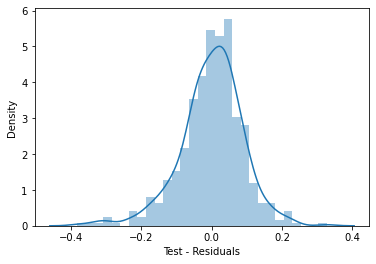

In [351]:
#Error terms Distribution on training data set:
res =  y_train - y_train_pred
res = pd.Series(res, name="Test - Residuals")
sns.distplot(res)

<AxesSubplot:xlabel='Test - Residuals', ylabel='temp'>

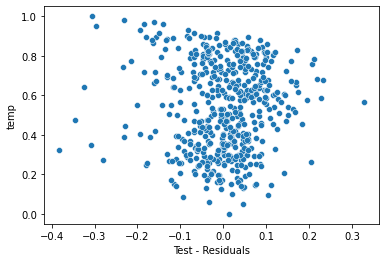

In [352]:
# pattern in residuals:
sns.scatterplot(res,x_train_rfe["temp"])


<AxesSubplot:xlabel='Test - Residuals', ylabel='windspeed'>

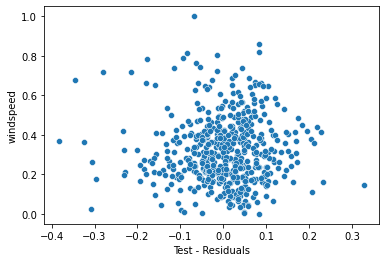

In [353]:
# pattern in residuals:
sns.scatterplot(res,x_train_rfe["windspeed"],)

<AxesSubplot:xlabel='Test - Residuals', ylabel='hum'>

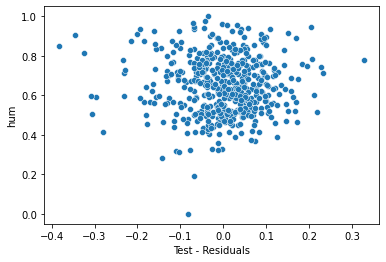

In [354]:
# pattern in residuals:
sns.scatterplot(res,x_train_rfe["hum"])

**5. Prediction and Evaluation on test data:**

In [355]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
127,0,0,1,21.661653,25.94665,63.1667,5.000712,4333,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [356]:
# scaling

df_test[scale_vars] = scaler.transform(df_test[scale_vars])

In [357]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light snow,weathersit_mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
127,0,0,1,0.584649,0.577380,0.650923,0.069510,0.495973,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0.232858,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [358]:
# dividing y_test and X-test
y_test = df_test.pop("cnt")
x_test = df_test

In [359]:
# Selecting only features that are finialised in training data set:
x_test = x_test[rfe_cols]
x_test

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_july,mnth_september,weathersit_light snow,weathersit_mist
184,0,1,0.831783,0.657364,0.084219,0,0,1,0,0,1
535,1,0,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,0,0,0.511964,0.837699,0.334206,0,1,0,0,0,1
221,0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,0.519232,0.756118,0.283397,0,1,0,0,0,0
127,0,0,0.584649,0.650923,0.069510,1,0,0,0,0,0
640,1,0,0.745598,0.817947,0.052115,0,1,0,0,0,1
72,0,0,0.331557,0.512107,0.203418,0,0,0,0,0,0


In [360]:
#Adding Constant:
x_test = sm.add_constant(x_test)

In [361]:
x_test

,const,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_july,mnth_september,weathersit_light snow,weathersit_mist
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,1,0,0,1
535,1.0,1,0,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,1,0,0,0,1
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.756118,0.283397,0,1,0,0,0,0
127,1.0,0,0,0.584649,0.650923,0.069510,1,0,0,0,0,0
640,1.0,1,0,0.745598,0.817947,0.052115,0,1,0,0,0,1
72,1.0,0,0,0.331557,0.512107,0.203418,0,0,0,0,0,0


***4.1 Prediction on Response variable:***

In [362]:
# predictions
y_pred = lm_model5.predict(x_test)

In [363]:
y_pred

184    0.389505
535    0.933015
299    0.399177
221    0.608387
152    0.636557
         ...   
702    0.706317
127    0.524197
640    0.823874
72     0.291571
653    0.730719
Length: 220, dtype: float64

***4.2 Model Evaluation***

In [364]:
# Model Evaluation
#R square:
r2_score = r2_score(y_true=y_test, y_pred= y_pred)

In [365]:
r2_score

0.8050021066128354

In [366]:
# Mean Square Error:
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)

In [367]:
mse

0.009323683777780676

<AxesSubplot:ylabel='cnt'>

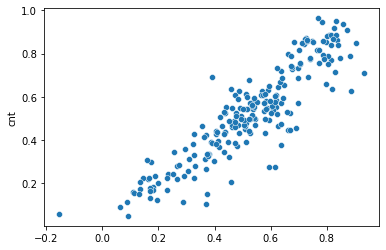

In [368]:
# Scatter plot
sns.scatterplot(y=y_test, x = y_pred)

**5. Residual Analysis on test data:**

<AxesSubplot:ylabel='Density'>

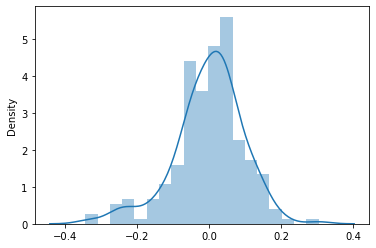

In [369]:
#Error terms Distribution on test data set:
rse = y_test- y_pred
sns.distplot(rse)